In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams

In [2]:
train = pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
submission_data = pd.read_csv('submission_format.csv')

In [3]:
print(train.shape)
print(test.shape)
print(train_labels.shape)

(1456, 24)
(416, 24)
(1456, 4)


In [4]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
train_dengue = pd.merge(train,train_labels,on=['city','year','weekofyear'])

In [6]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [7]:
print(train_dengue.shape)
print(test.shape)

(1456, 25)
(416, 24)


In [8]:
train_dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [9]:
#Another way of finding null data
test.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

### Missing data

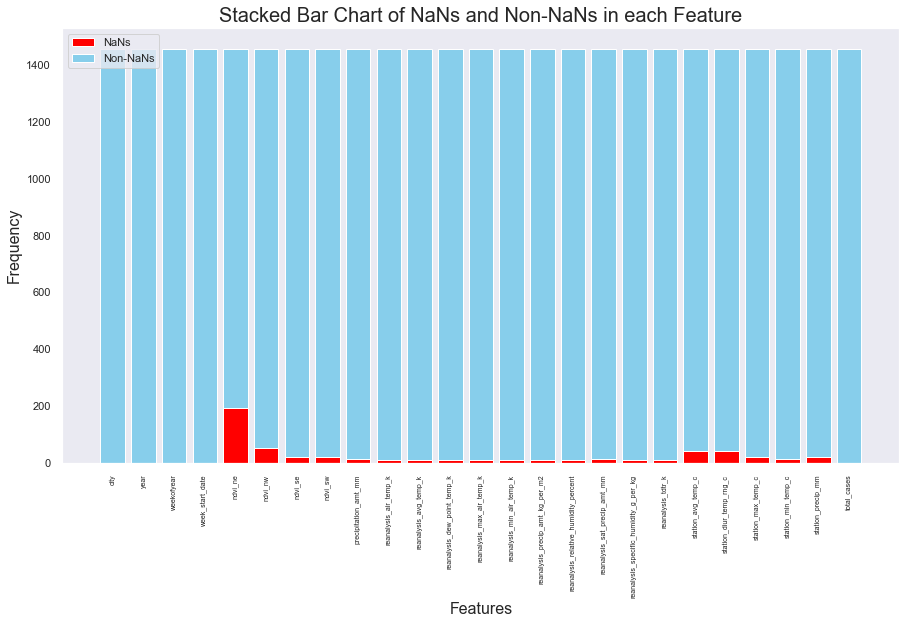

In [10]:
def find_col_nans(df):
    '''
    FUNCTION: To display stacked bar chart of the NaNs vs Non-NaNs of each column in dataframe provided.
    
    Parameters
    ----------
    df: (pandas.DataFrame) Dataframe
    
    Returns
    -------
    Nothing. Displays the Stacked Bar chart
    '''
    # Get number of NaNs for each column
    nan_count_per_col = len(df) - df.count(axis=0)
    
    # Graph configs
    rcParams['figure.figsize'] = 15, 8
    sns.set()
    
    # Create NaNs
    plt.bar(np.arange(len(df.columns)), nan_count_per_col, color='red', edgecolor='white', label='NaNs')
    
    # Create Non-NaNs
    plt.bar(np.arange(len(df.columns)), df.count(), bottom=nan_count_per_col, color='skyblue', edgecolor='white', label='Non-NaNs')
    
    plt.title('Stacked Bar Chart of NaNs and Non-NaNs in each Feature', fontsize=20)
    plt.ylabel('Frequency', fontsize=16)
    plt.xlabel('Features', fontsize=16)
    plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90, fontsize=7)
    plt.grid()
    plt.legend(loc='upper left');
    
find_col_nans(train_dengue)

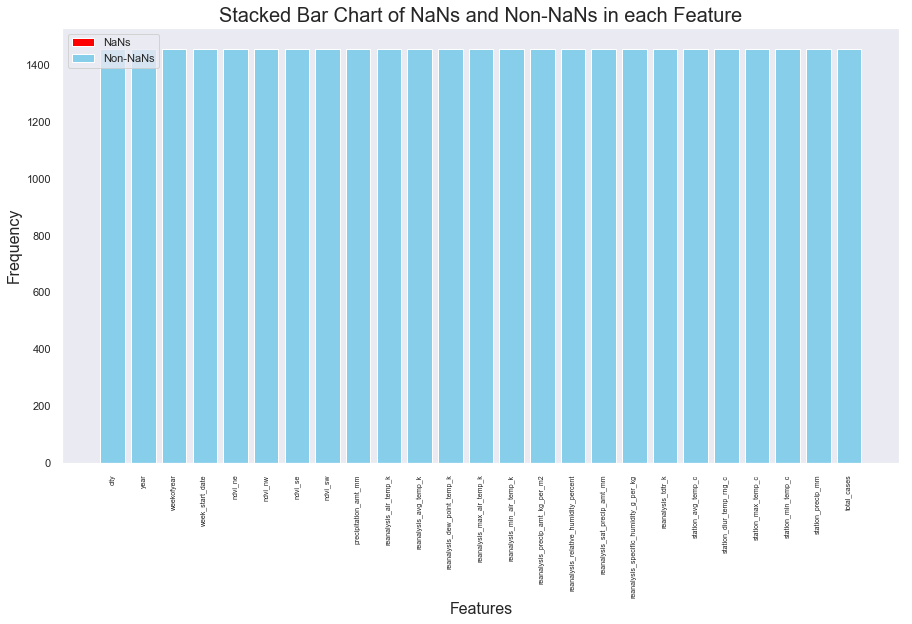

In [11]:
#take care of missing data
train_dengue.fillna(train_dengue.mode().iloc[0],inplace=True)
find_col_nans(train_dengue)

In [12]:
train_dengue.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [13]:
train_dengue.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

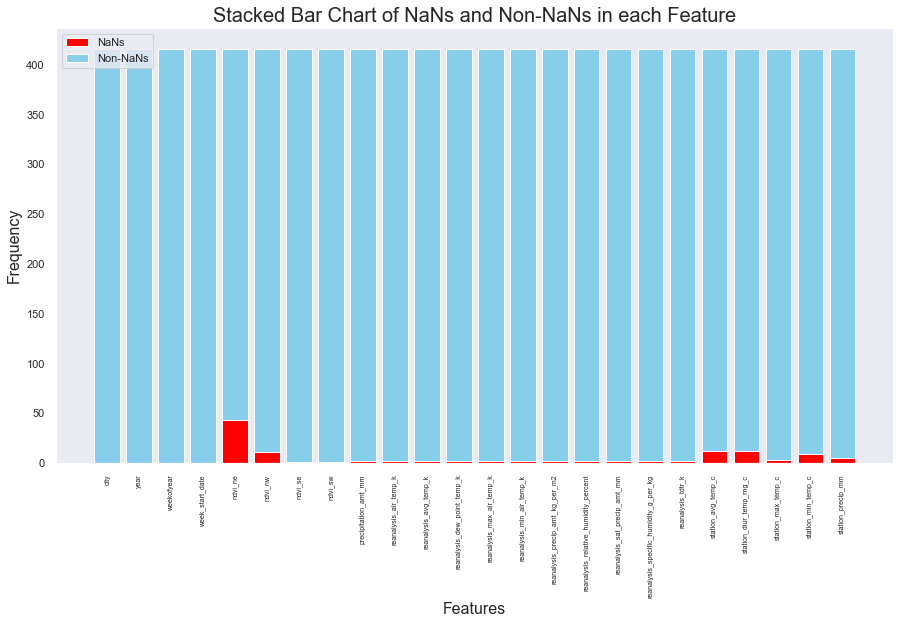

In [14]:
find_col_nans(test)

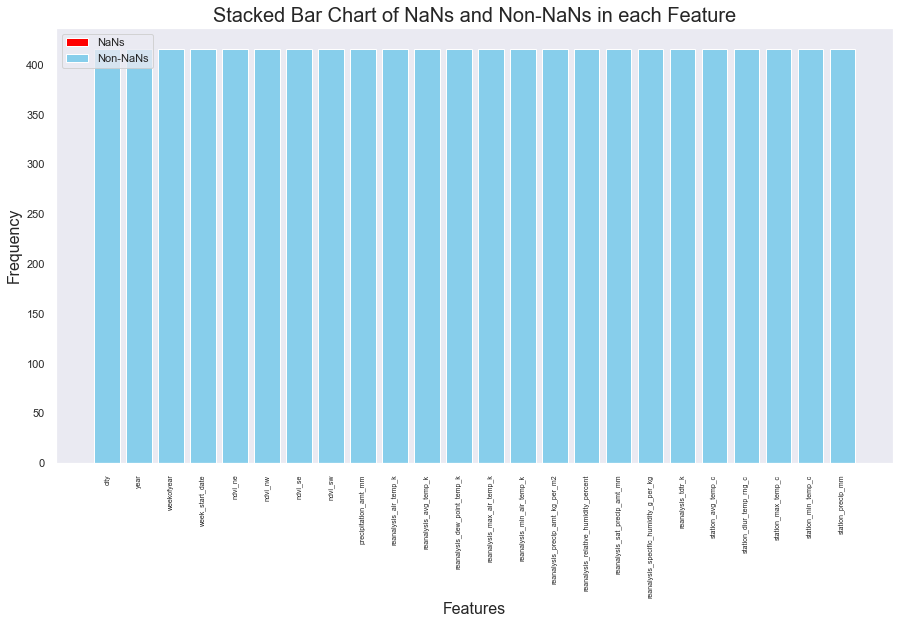

In [15]:
#take care of missing data in test
test.fillna(test.mode().iloc[0],inplace=True)
find_col_nans(test)

In [16]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip

In [18]:
x = [train_dengue, test]
for i in x:
    i['week_start_date'] = pd.to_datetime(i['week_start_date'], format='%Y-%m-%d')
    
    i['day_start_date']=i['week_start_date'].dt.weekday
    i['year_start_date']=i['week_start_date'].dt.year
    i['quarter_start_date']=i['week_start_date'].dt.quarter
    i['month_start_date']=i['week_start_date'].dt.month

In [19]:
train_dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day_start_date,year_start_date,quarter_start_date,month_start_date
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,0,1990,2,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,0,1990,2,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,0,1990,2,5
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,0,1990,2,5
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,0,1990,2,5


In [20]:
train_dengue.drop('week_start_date',axis=1,inplace=True)
test.drop('week_start_date',axis=1,inplace=True)

In [21]:
train_dengue.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day_start_date,year_start_date,quarter_start_date,month_start_date
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,25.442857,6.900000,29.4,20.0,16.0,4,0,1990,2,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,26.714286,6.371429,31.7,22.2,8.6,5,0,1990,2,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.714286,6.485714,32.2,22.8,41.4,4,0,1990,2,5
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,27.471429,6.771429,33.3,23.3,4.0,3,0,1990,2,5
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,28.942857,9.371429,35.0,23.9,5.8,6,0,1990,2,5


In [22]:
train_dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 28 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relat

In [25]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['city']:
    train_dengue[i] = labelencoder.fit_transform(train_dengue[i])
    test[i] = labelencoder.fit_transform(test[i])

train_dengue.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day_start_date,year_start_date,quarter_start_date,month_start_date
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,25.442857,6.900000,29.4,20.0,16.0,4,0,1990,2,4
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,26.714286,6.371429,31.7,22.2,8.6,5,0,1990,2,5
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.714286,6.485714,32.2,22.8,41.4,4,0,1990,2,5
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,27.471429,6.771429,33.3,23.3,4.0,3,0,1990,2,5
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,28.942857,9.371429,35.0,23.9,5.8,6,0,1990,2,5


In [27]:
#Training the model

In [28]:
X = train_dengue.drop(['total_cases'],axis=1)
y = train_dengue['total_cases']

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=0)


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.score(x_train,y_train)

0.21984349927586966

In [34]:
y_pred = lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

21.845059567081027

In [41]:
y_submission = lr.predict(test)

In [43]:
y_submission = y_submission.astype('int64')
y_submission[:5]

array([12, 12,  5, 12, 20])

In [44]:
submission_data.total_cases = y_submission

In [45]:
#Output csv file
submission_data.to_csv('lr_sub.csv',index=None,header=True)
submission_data.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,12
2,sj,2008,20,5
3,sj,2008,21,12
4,sj,2008,22,20


In [ ]:
# Do with pd.getdummies()